In [493]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [525]:
res = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\res_sarima_fix.csv")
res.drop(res.columns[0], axis=1, inplace=True)
res.head()
res.rename(columns={'Series 1': 'x'}, inplace=True)

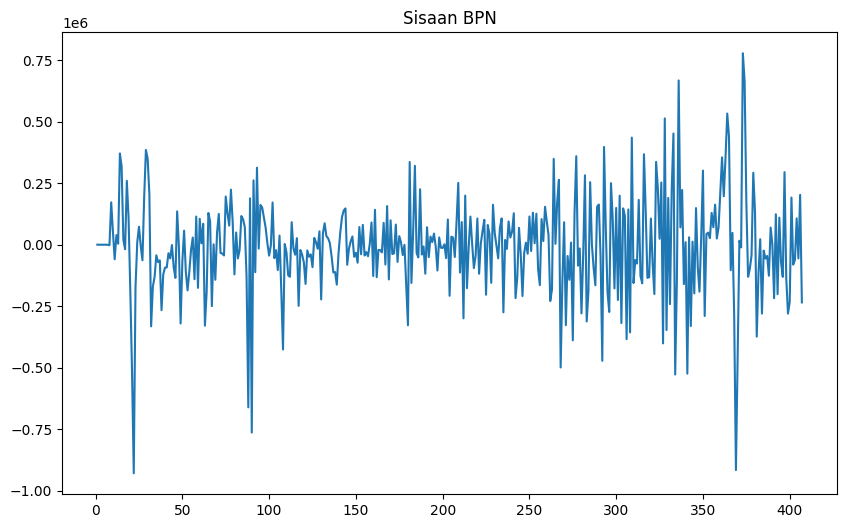

In [526]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(res)+1), res['x'])
plt.title('Sisaan BPN')
plt.show()

In [534]:
res_std = res['x'] 

In [535]:
res_std.shape

(407,)

<Axes: >

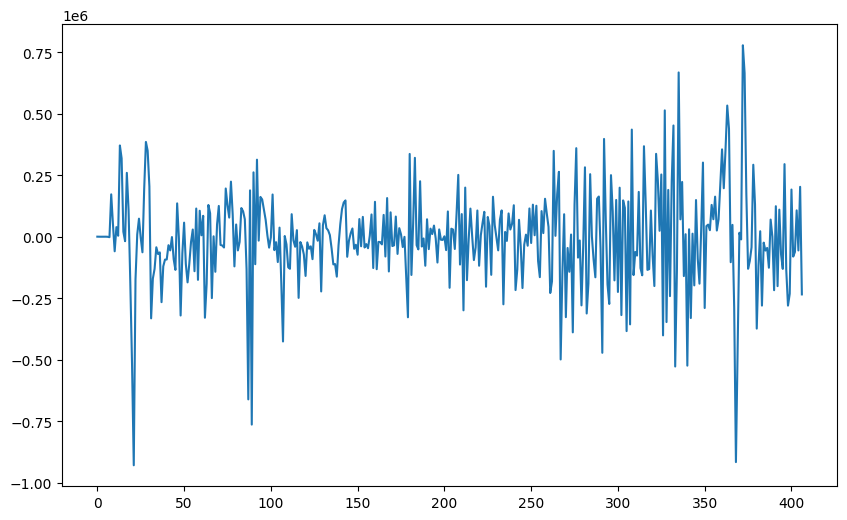

In [536]:
res_std.plot(figsize=(10, 6))

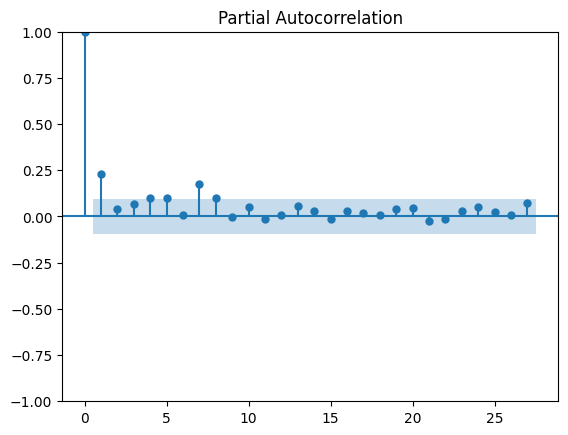

In [516]:
plot_pacf(np.array(res_std)**2)
plt.show()

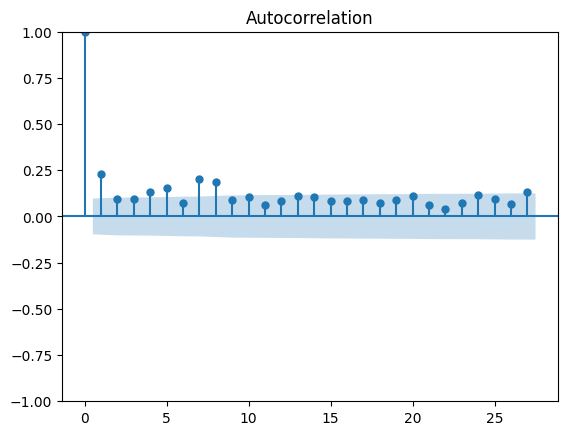

In [517]:
plot_acf(np.array(res_std)**2)
plt.show()

In [537]:
model_res = arch_model(res_std, vol='GARCH', p=1, o=0, q=1,mean='zero')
model_res_fit = model_res.fit(disp="off")
model_res_fit.summary()

d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.953e+10. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      x   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -5493.01
Distribution:                  Normal   AIC:                           10992.0
Method:            Maximum Likelihood   BIC:                           11004.0
                                        No. Observations:                  407
Date:                Mon, Oct 28 2024   Df Residuals:                      407
Time:                        16:19:23   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.9622e+09  1.792e+09      2.211  2.704e-02 [4.498e+08,7.475e+09]
alpha[1]       0.3332      0.104      3.194  1.401e-03     [  0.129,  0.538]
beta[1]        0.6033  9.551e-02      6.317  2.661e-10     [  0.416,  0.791]
============================================================================

Covariance estimator: robust
"""

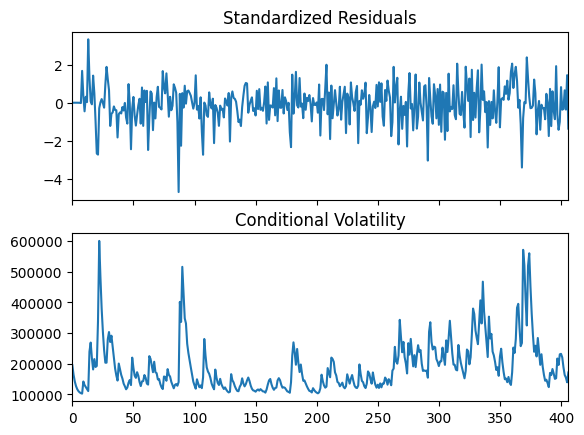

In [538]:
fig = model_res_fit.plot()

In [539]:
res_std.shape

(407,)

In [203]:
np.random.seed(31)
epsilon_train = np.random.normal(0, 1, 406)

In [246]:
epsilon_train_90 = np.random.normal(0, 1, 489)

In [252]:
epsilon_train_90 = list(epsilon_train_90)
epsilon_train_90 = pd.DataFrame(epsilon_train_90)

In [322]:
eps_train = epsilon_train_90[0]

In [403]:
eps_train_75 = np.random.normal(0, 1, 407)

In [253]:
epsilon_train_90.to_csv('D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\epsilon_train_90.csv')

In [540]:
condvol_train = model_res_fit.conditional_volatility 

In [541]:
et_train = (np.sqrt(condvol_train))  * eps_train_75
et_train_hasil = pd.DataFrame(et_train)

In [332]:
et_train_baru  = model_res_fit.conditional_volatility * 100 * eps_train
et_train_baru = pd.DataFrame(et_train_baru)
et_train_baru.to_csv('D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\et_train_baru.csv')

<Axes: >

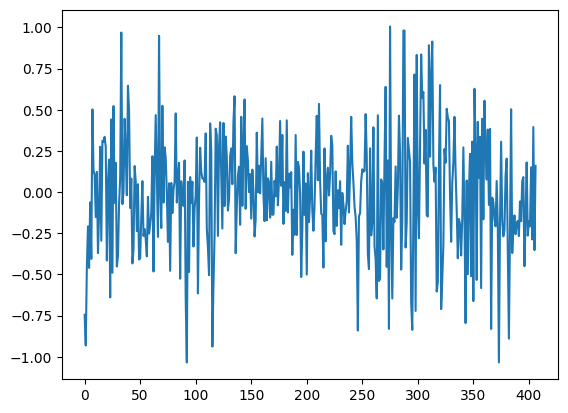

In [523]:
et_train.plot()

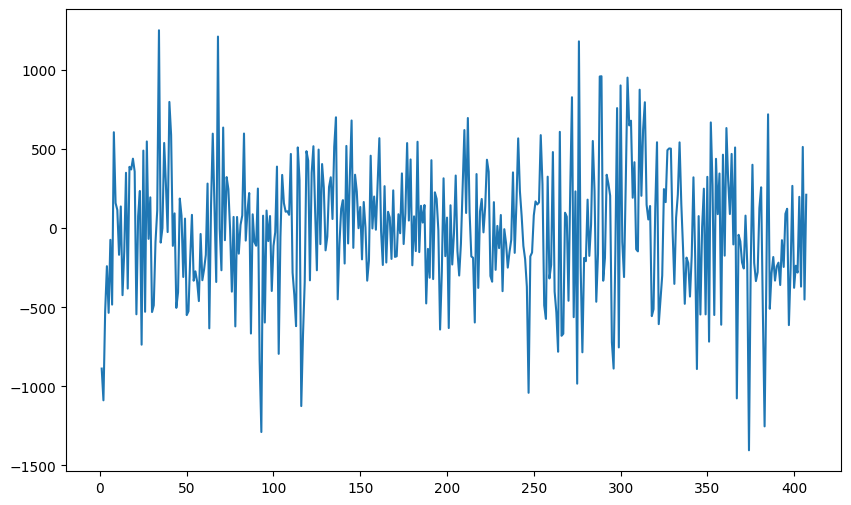

In [542]:
## plot et_train
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(et_train)+1), et_train)

In [543]:
et_train_hasil.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\et_train_hasil.csv")

In [ ]:
et

In [484]:
garch_stresidual = model_res_fit.resid / model_res_fit.conditional_volatility

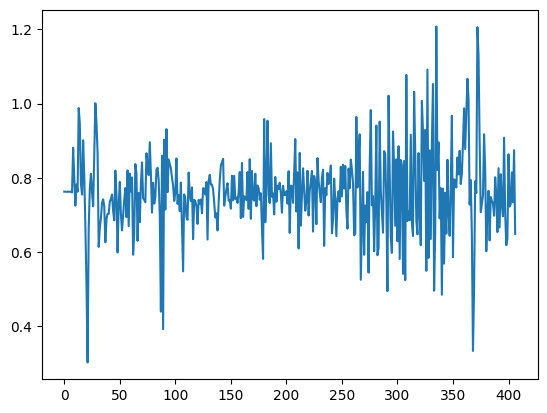

In [461]:
plt.plot(garch_stresidual)

In [485]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox((garch_stresidual), return_df=True)
print(result_df)

     lb_stat  lb_pvalue
1   0.145567   0.702808
2   0.322835   0.850937
3   0.728683   0.866438
4   0.911158   0.922955
5   1.162546   0.948420
6   5.502978   0.481097
7   6.829726   0.446822
8   9.322515   0.315824
9   9.955888   0.354068
10  9.963494   0.443702


In [486]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

0.05097945326628894


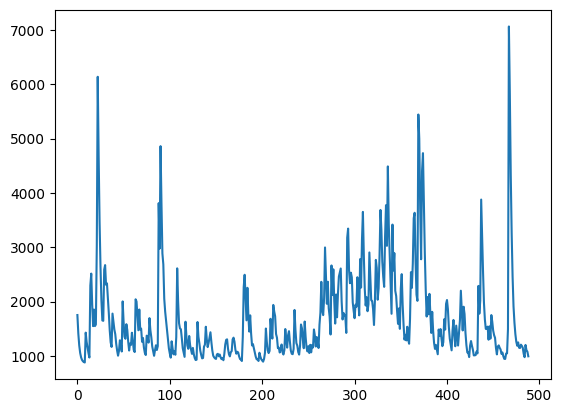

In [337]:
condvol = model_res_fit.conditional_volatility * 100
plt.plot(condvol)

In [148]:
garch_stresidual.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\garch_stresidual.csv")

In [487]:
data_diff = res_std

In [455]:
data_diff 

0      2.525266
1      2.524448
2      2.524362
3      2.524410
4      2.524576
         ...   
402    2.414173
403    2.697176
404    2.430105
405    2.895369
406    2.146814
Name: x, Length: 407, dtype: float64

In [488]:
pred_long = model_res_fit.forecast(horizon=135)

In [492]:

pred_long_res = pd.DataFrame(np.sqrt(pred_long.variance.values[-1]) * eps_test_75, columns=['condvol'])
pred_long_res.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\pred_long_res.csv")

In [456]:
condvar_test = []
test_size = 135
for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1  ,mean='zero')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07933. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07926. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is po

In [458]:
condvar_test = np.array(condvar_test)
condvar_test

array([2.66933453, 8.26889719, 2.67536915, 8.15087017, 2.68453824,
       2.68939154, 8.31526761, 8.33900911, 2.69644774, 2.69653487,
       8.54878458, 8.19282961, 2.72906502, 2.72919877, 2.7450943 ,
       2.70302837, 2.73496928, 8.46506103, 2.72702801, 8.32289808,
       2.73850575, 2.76584775, 8.40890645, 2.79310696, 8.19882372,
       2.87601378, 2.78158428, 8.0791717 , 8.15485795, 2.84531148,
       8.17482213, 8.0509918 , 8.15906854, 2.82015383, 2.83359806,
       2.84219789, 8.03419693, 2.94702549, 8.09749036, 2.95068272,
       2.9395066 , 8.20846761, 8.0949759 , 2.95137224, 8.18257767,
       8.11703072, 8.05864218, 3.05151014, 8.11164997, 8.06028199,
       2.9671977 , 8.00607056, 2.97276315, 8.07102763, 8.04194565,
       2.9932734 , 2.98657313, 7.99266564, 7.99642331, 7.99269438,
       7.99724047, 8.15984054, 3.04657449, 8.05675076, 3.24922411,
       3.24651646, 8.09428071, 8.0604403 , 3.24706919, 3.25436595,
       3.25503329, 3.26134143, 3.2601061 , 8.05397509, 8.09587

In [459]:
condvar_test.shape

(135,)

In [268]:
epsilon_test_90 = np.random.normal(0, 1, test_size)

In [490]:
eps_test_75 = np.random.normal(0, 1, 135)

In [462]:
condvar_test_result = np.sqrt((condvar_test * (14685.32) + (-8645.816))) * eps_test_75
condvar_test_result = pd.DataFrame(condvar_test_result)

Text(0.5, 1.0, 'Conditional Variance Test')

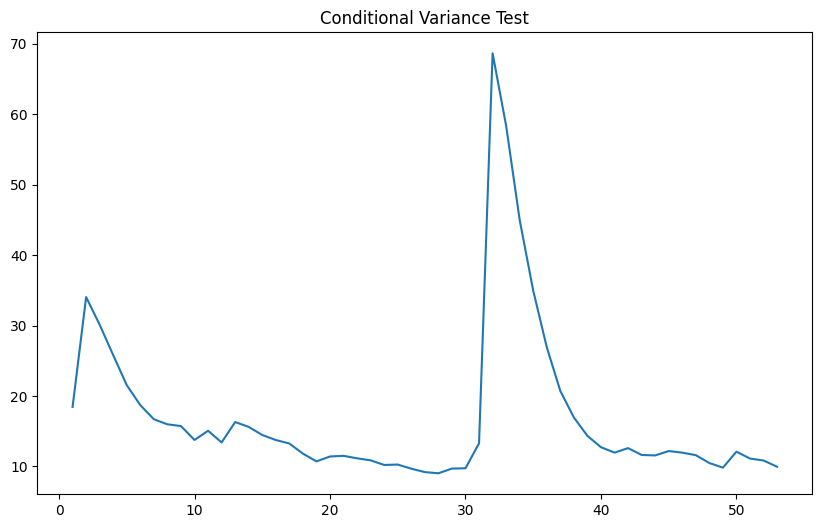

In [277]:
### plot condvar_test
condvar_test = pd.DataFrame(condvar_test)
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(condvar_test)+1), condvar_test)
plt.title('Conditional Variance Test')

<Axes: >

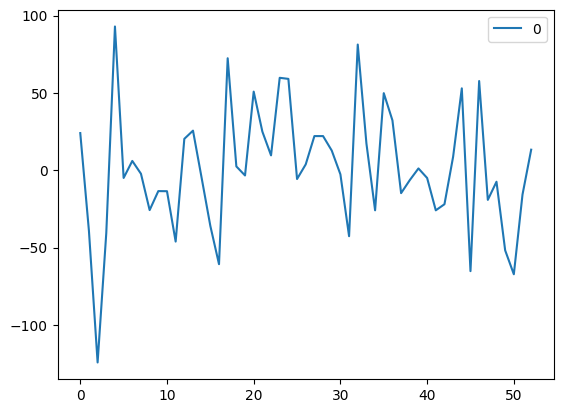

In [278]:
condvar_test_result.plot()

In [463]:
condvar_test_result.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\predict_et_baru_75.csv")

In [280]:
epsilon_test_90 = pd.DataFrame(epsilon_test_90)
epsilon_test_90.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\epsilon_test_90.csv")

In [349]:
eps_tes_90 = epsilon_test_90[0]

In [247]:
scaled_res = residual_test * res['x'].std() + res['x'].mean()

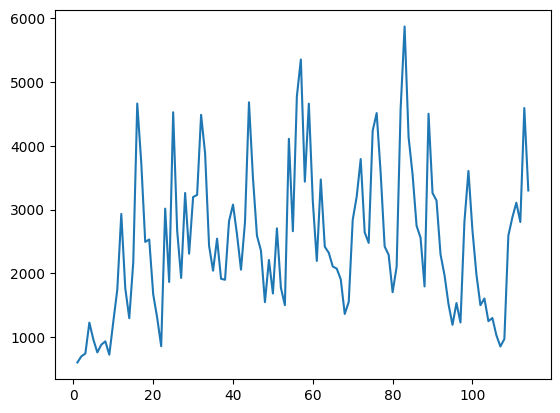

In [250]:
plt.plot(range(1, test_size+1), scaled_res)

In [239]:
scaled_res.shape

(114,)

In [268]:
scaled_res = pd.DataFrame(scaled_res)
scaled_res.to_csv("D:\\IPB\\5\\MPDW\\project\\2 garch try\\condvar_test_rnorm.csv")

BoxCox

In [281]:
res_bc = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\res_sarima_bc_fix.csv")

In [284]:
res_std_bc = res_bc['x'] * 0.00001

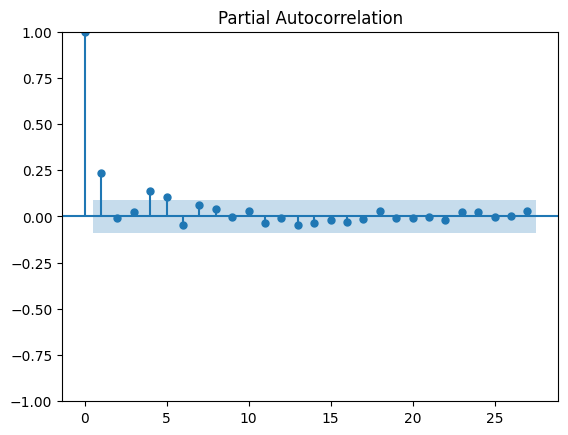

In [285]:
plot_pacf(np.array(res_std_bc)**2)
plt.show()

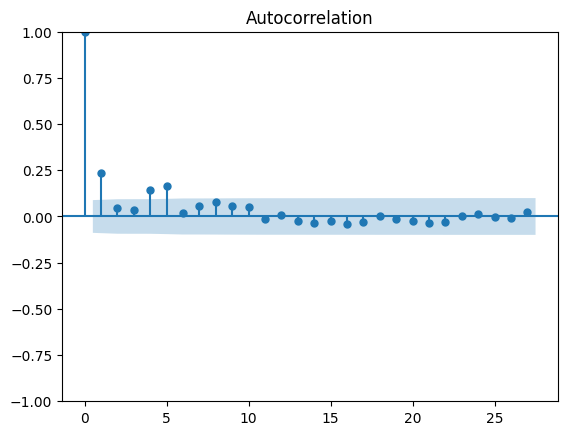

In [286]:
plot_acf(np.array(res_std_bc)**2)
plt.show()

In [291]:
model_res_bc = arch_model(res_std_bc, vol='GARCH', p=1, o=0, q =1,mean='zero',dist='ged')
model_res_bc_fit = model_res_bc.fit()
model_res_bc_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2539.9493310216194
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2456.314709025395
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2454.5051917645346
Iteration:      4,   Func. Count:     24,   Neg. LLF: 2471.41293588216
Iteration:      5,   Func. Count:     30,   Neg. LLF: 2454.379502500253
Iteration:      6,   Func. Count:     36,   Neg. LLF: 2454.3660001836956
Iteration:      7,   Func. Count:     42,   Neg. LLF: 2454.350628360946
Iteration:      8,   Func. Count:     47,   Neg. LLF: 2454.3499947677915
Iteration:      9,   Func. Count:     52,   Neg. LLF: 2454.346725786785
Iteration:     10,   Func. Count:     57,   Neg. LLF: 2454.330635040707
Iteration:     11,   Func. Count:     62,   Neg. LLF: 2454.262102051731
Iteration:     12,   Func. Count:     67,   Neg. LLF: 2454.1162803673105
Iteration:     13,   Func. Count:     72,   Neg. LLF: 2454.1069467686116
Iteration:     14,   Func. Count:     77,   Neg. LLF: 2454.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Zero Mean - GARCH Model Results                              
==========================================================================================
Dep. Variable:                                  x   R-squared:                       0.000
Mean Model:                             Zero Mean   Adj. R-squared:                  0.002
Vol Model:                                  GARCH   Log-Likelihood:               -2454.11
Distribution:      Generalized Error Distribution   AIC:                           4916.21
Method:                        Maximum Likelihood   BIC:                           4932.98
                                                    No. Observations:                  489
Date:                            Mon, Oct 28 2024   Df Residuals:                      489
Time:                                    10:02:21   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        236.9571    100.721      2.353  1.864e-02 [ 39.548,4.344e+02]
alpha[1]       0.4521      0.153      2.952  3.158e-03   [  0.152,  0.752]
beta[1]        0.4980      0.119      4.181  2.905e-05   [  0.265,  0.732]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.1914      0.123      9.710  2.738e-22 [  0.951,  1.432]
========================================================================

Covariance estimator: robust
"""

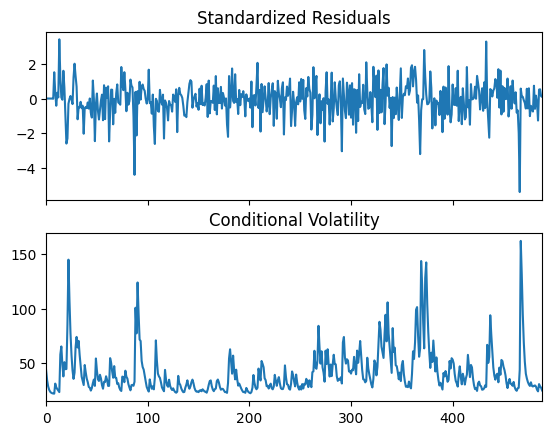

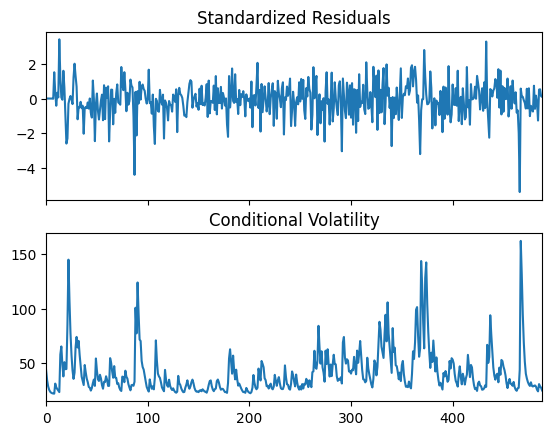

In [294]:
model_res_bc_fit.plot()

In [295]:
et_train_bc = np.sqrt(model_res_bc_fit.conditional_volatility / 0.00001)  * epsilon_train_90

In [298]:
et_train_bc = pd.DataFrame(et_train_bc[0])

In [299]:
et_train_bc.to_csv("D:\\IPB\\5\\MPDW\\project\\4 garch try 2\\et_train_bc_90.csv")

In [1]:
!pip install ntscraper

  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------- ----------------------- 1.6/3.8 MB 8.7 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 7.1 MB/s eta 0:00:00
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ntscraper import Nitter

scraper = Nitter(log_level = 1)
test = scraper.get_tweets("mandalika",mode = "term",since = "2024-01-01", until="2024-09-30")
### turn the result to data frame
import pandas as pd

## json to df
df = pd.json_normalize(test)

##
tweets = []
names = []
users = []
dates = []
likes = []
repost = []
replies = []

for i in range(len(df['tweets'][0])):
  data = df['tweets'][0][i]
  tweets.append(data['text'])
  names.append(data['user']['name'])
  users.append(data['user']['username'])
  dates.append(data['date'])
  likes.append(data['stats']['likes'])
  repost.append(data['stats']['reposts'])
  replies.append(data['stats']['comment'])

Testing instances: 100%|██████████| 16/16 [00:36<00:00,  2.26s/it]

04-Nov-24 06:41:28 - No instance specified, using random instance https://nitter.privacydev.net


04-Nov-24 06:41:36 - Current stats for mandalika: 17 tweets, 0 threads...
04-Nov-24 06:41:38 - Fetching error: Instance has been rate limited.Use another instance or try again later.


KeyError: 'tweet'

In [7]:
df['tweets'][0]

[{'link': 'https://twitter.com/beritajatimcom/status/1840541587069350031#m',
  'text': 'Jokowi Apresiasi Pelaksanaan MotoGP Indonesia di Mandalika. 👇  Presiden RI Joko Widodo (Jokowi) memberikan apresiasi tinggi terhadap pelaksanaan MotoGP Indonesia yang digelar di Sirkuit Mandalika… dlvr.it/TDq18x #Olahraga #Jokowidodo #jokowi #motogp via @beritajatimcom',
  'user': {'name': 'beritajatim',
   'username': '@beritajatimcom',
   'profile_id': '1383296141022810119',
   'avatar': 'https://pbs.twimg.com/profile_images/1383296141022810119/hvPUhWiS_bigger.jpg'},
  'date': 'Sep 29, 2024 · 11:58 PM UTC',
  'is-retweet': False,
  'is-pinned': False,
  'external-link': '',
  'replying-to': [],
  'quoted-post': {},
  'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0},
  'pictures': [],
  'videos': [],
  'gifs': []},
 {'link': 'https://twitter.com/brekganteng/status/1840541339660013725#m',
  'text': 'Kutukan betul marquez di mandalika',
  'user': {'name': 'anaktabung',
   'username': 

In [9]:
tweets = []
names = []
users = []
dates = []
likes = []
repost = []
replies = []

for i in range(len(df['tweets'][0])):
  data = df['tweets'][0][i]
  tweets.append(data['text'])
  names.append(data['user']['name'])
  users.append(data['user']['username'])
  dates.append(data['date'])
  likes.append(data['stats']['likes'])
  repost.append(data['stats']['retweets'])
  replies.append(data['stats']['comments'])

In [10]:
## create df
df = pd.DataFrame({'tweets':tweets,'names':names,'users':users,'dates':dates,'likes':likes,'repost':repost,'comment':replies})
df.head()

,tweets,names,users,dates,likes,repost,comment
0,Jokowi Apresiasi Pelaksanaan MotoGP Indonesia ...,beritajatim,@beritajatimcom,"Sep 29, 2024 · 11:58 PM UTC",0,0,0
1,Kutukan betul marquez di mandalika,anaktabung,@brekganteng,"Sep 29, 2024 · 11:57 PM UTC",0,0,0
2,Pembalap Thailand yang musim depan akan naik k...,Gila Bola Thailand,@su_kitman,"Sep 29, 2024 · 11:55 PM UTC",1,1,0
3,Presiden mengapresiasi penyelenggaraan MotoGP ...,Radio Kalimaya Bhaskara Malang,@kalimaya_malang,"Sep 29, 2024 · 11:50 PM UTC",0,0,0
4,Marc Marquez akan Buka Parade MotoGP Mandalika...,Redaksi Inilahkito.com,@red_inilahkito,"Sep 29, 2024 · 11:47 PM UTC",0,0,0


In [11]:
df.to_csv("D:\\IPB\\5\\tweets_mandalika.csv")

In [12]:
df.shape

(17, 7)